### Create a function to pull the previous 100 games in League

In [1]:
api_key = "RGAPI-8547a5c9-2219-4ad2-8ef3-3489bcddfd63"

In [2]:
def getPast100Games(api_key,summonerName,numGames=30):
    import pandas as pd
    import requests 

    api_key = api_key
    api_url = f"https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{summonerName}"
    api_url = api_url + '?api_key=' + api_key

    resp = requests.get(api_url)
    player_info = resp.json()

    api_url=f'https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/u9MudfP0qJaGcFvkzBCGwfG6i4yc8yPVpgiXNZegdOUyuhGMq_IVjY9eQWACfoS9mxiX_nc6gVefrQ/ids?start=0&count={numGames}'
    api_url = api_url + '&api_key=' + api_key 
    resp = requests.get(api_url)
    match_ids = resp.json()

    df=pd.DataFrame([])
    for match in match_ids:
        try:
            print(f'Pulling {match}')
            match_id=f'https://americas.api.riotgames.com/lol/match/v5/matches/{match}'
            api_url = match_id + '?api_key=' + api_key 
            resp = requests.get(api_url)
                    
            rspn_txt=resp.json()['info']['participants']
            df1=pd.DataFrame(rspn_txt)
            # print(df1.head(1))
            # print(df1[['summonerName']])
            df1=df1.loc[df1['summonerName']==summonerName]
            # print(df1)
            df1=df1[['kills'
            ,'deaths'
            ,'assists'
            ,'magicDamageDealt'
            ,'physicalDamageDealt'
            # ,'challenges'
            # ,'damageTakenOnTeamPercentage'
            # ,'killParticipation'
            ,'damageDealtToObjectives'
            ,'firstBloodKill'
            ,'goldEarned'
            ,'champExperience'
            ,'timePlayed'
            ,'gameEndedInEarlySurrender'
            ,'summonerName'
            ,'win'
            ]]
            # print(df1.head(1))
            df=pd.concat([df,df1],ignore_index=True)
            # print(df.head(1))
            
            print('\tComplete')

        except:
            print(f'\tFAIL')
    return (df,player_info)

In [3]:
import time
print(f'pulling Jason')
jason_df,player_info=getPast100Games(api_key,"DDuck Hat",30)

time.sleep(120)

print(f'pulling Jeff')
jeff_df,player_info=getPast100Games(api_key,"Triemer",30)

time.sleep(120)

print(f'pulling Jared')
jared_df,player_info=getPast100Games(api_key,"Knuckle Touch",30)


pulling Jason


Pulling NA1_4958444114
   allInPings  assistMePings  assists  baronKills  basicPings  bountyLevel  \
0           0              0       27           0           0            0   

                                          challenges  champExperience  \
0  {'12AssistStreakCount': 0, 'abilityUses': 102,...            11983   

   champLevel  championId  ... turretKills  turretTakedowns  turretsLost  \
0          14         202  ...           1                3            0   

   unrealKills  visionClearedPings  visionScore  visionWardsBoughtInGame  \
0            0                   0            0                        0   

   wardsKilled  wardsPlaced   win  
0            0            0  True  

[1 rows x 130 columns]
     summonerName
0    TheOneMadMan
1        Buckwaad
2  Splatter Hound
3        namchi18
4         Triemer
5           AAJdc
6      zu de Meow
7      meow de Zu
8          Reagix
9     GummyxBears
Empty DataFrame
Columns: [allInPings, assistMePings, assists, baronKills,

In [4]:
import pandas as pd
df=pd.concat([jeff_df,jason_df,jared_df],ignore_index=True)

In [5]:
df.summonerName.unique()

array(['Triemer', 'DDuck Hat'], dtype=object)

In [6]:
df

,kills,deaths,assists,magicDamageDealt,physicalDamageDealt,damageDealtToObjectives,firstBloodKill,goldEarned,champExperience,timePlayed,gameEndedInEarlySurrender,summonerName,win
0,9,8,32,11977,33846,945,False,11581,14153,843,False,Triemer,True
1,12,8,14,1183,43220,4046,True,11312,12141,800,False,Triemer,True
2,9,11,18,5921,39754,446,False,12582,13574,980,False,Triemer,False
3,11,14,30,13026,51548,925,False,14854,20291,1290,False,Triemer,False
4,7,12,37,7800,25250,1081,False,13689,22424,1143,False,Triemer,True
5,5,14,34,39743,10988,85,False,14551,20369,1365,False,Triemer,False
6,4,7,31,8862,6375,756,False,8841,12236,766,False,Triemer,True
7,5,7,25,2109,47519,1718,False,11270,14989,924,False,Triemer,True
8,10,18,21,79119,2125,0,True,14724,21026,1341,False,Triemer,True
9,12,14,29,135828,2754,1187,False,23144,44837,2094,False,Triemer,False


In [7]:
df['win'] = df['win']*1
df['firstBloodKill'] = df['firstBloodKill']*1
df['gameEndedInEarlySurrender'] = df['gameEndedInEarlySurrender']*1
df['damage']=df['physicalDamageDealt']+df['magicDamageDealt']
df['kda']=(df['kills']+df['assists'])/df['deaths']

In [8]:
df=df.loc[df['gameEndedInEarlySurrender']==False]
df=df[[
'kills',
'deaths',
'assists',
'magicDamageDealt',
'physicalDamageDealt',
'damageDealtToObjectives',
'firstBloodKill',
'goldEarned',
'champExperience',
'timePlayed',
'summonerName',
'win',
'damage',
'kda'
]]

In [9]:
df.head()

,kills,deaths,assists,magicDamageDealt,physicalDamageDealt,damageDealtToObjectives,firstBloodKill,goldEarned,champExperience,timePlayed,summonerName,win,damage,kda
0,9,8,32,11977,33846,945,0,11581,14153,843,Triemer,1,45823,5.125000
1,12,8,14,1183,43220,4046,1,11312,12141,800,Triemer,1,44403,3.250000
2,9,11,18,5921,39754,446,0,12582,13574,980,Triemer,0,45675,2.454545
3,11,14,30,13026,51548,925,0,14854,20291,1290,Triemer,0,64574,2.928571
4,7,12,37,7800,25250,1081,0,13689,22424,1143,Triemer,1,33050,3.666667


### Modelling

Now that we have some data, we can start to cook something up. Is there anyway Game 1 can predict game 2?

I can compare my data vs Jason's?
- Maybe I can show some anova modeling or logistic reg.

In [10]:
from scipy.stats import f_oneway
import researchpy as rp

In [11]:
g=rp.summary_cont(df['win'].groupby(df['summonerName']))
g=g.reset_index()
g

,summonerName,N,Mean,SD,SE,95% Conf.,Interval
0,DDuck Hat,9,0.4444,0.5270,0.1757,0.0393,0.8496
1,Triemer,29,0.5517,0.5061,0.0940,0.3592,0.7442


In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.f_oneway(df['win'][df['summonerName'] == 'Triemer'],
               df['win'][df['summonerName'] == 'DDuck Hat'])

F_onewayResult(statistic=0.30291062076071074, pvalue=0.5854626087582802)

In [13]:
g = df.groupby('summonerName')['win'].mean()
g

summonerName
DDuck Hat    0.444444
Triemer      0.551724
Name: win, dtype: float64

In [14]:
import matplotlib.pyplot as plt
def plotthis(this):
        fig = plt.figure(figsize= (5, 5))
        ax = fig.add_subplot(111)

        ax.set_title(f"Box Plot of {this} by Player", fontsize= 20)
        ax.set
        data = [df[this][df['summonerName'] == 'Triemer'],
                df[this][df['summonerName'] == 'DDuck Hat']]

        ax.boxplot(data,
                labels= ['Triemer', 'DDuck Hat'],
                showmeans= True)

        plt.xlabel("Player")
        plt.ylabel(this)
        
        g = df.groupby('summonerName')[this].mean()
        print(g)

        plt.show()

kills
summonerName
DDuck Hat    11.000000
Triemer       8.241379
Name: kills, dtype: float64


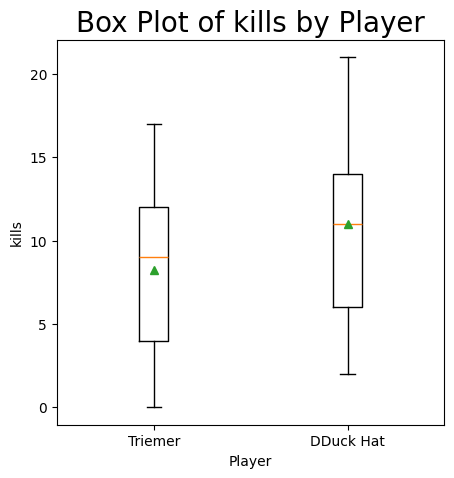

deaths
summonerName
DDuck Hat    8.555556
Triemer      9.310345
Name: deaths, dtype: float64


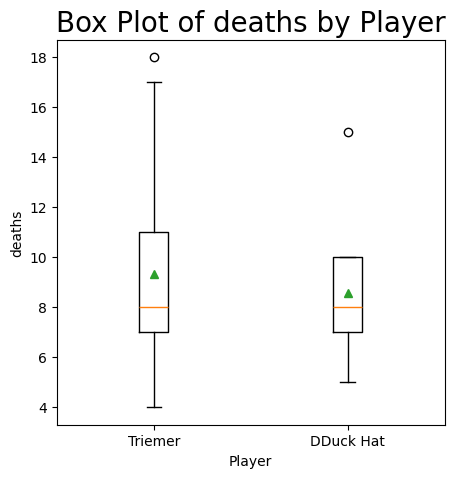

assists
summonerName
DDuck Hat    20.111111
Triemer      26.413793
Name: assists, dtype: float64


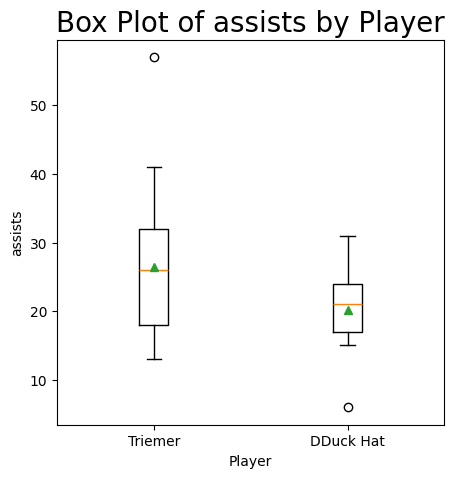

magicDamageDealt
summonerName
DDuck Hat    19605.555556
Triemer      30219.379310
Name: magicDamageDealt, dtype: float64


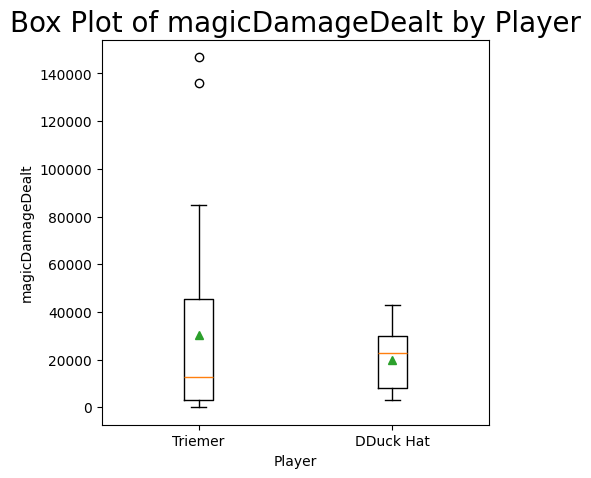

physicalDamageDealt
summonerName
DDuck Hat    30404.444444
Triemer      22168.413793
Name: physicalDamageDealt, dtype: float64


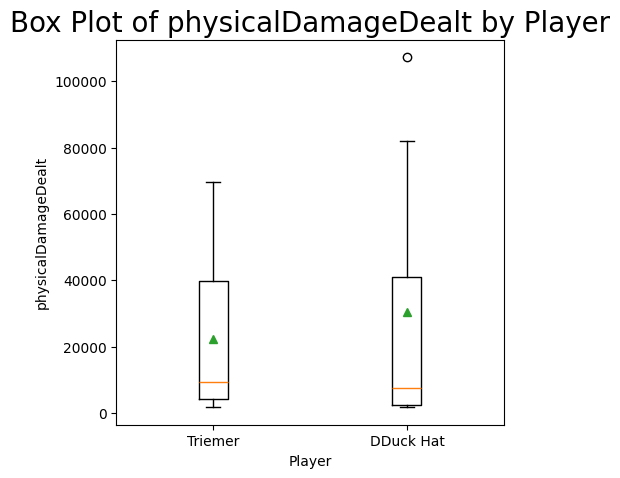

damageDealtToObjectives
summonerName
DDuck Hat     864.000000
Triemer      1188.448276
Name: damageDealtToObjectives, dtype: float64


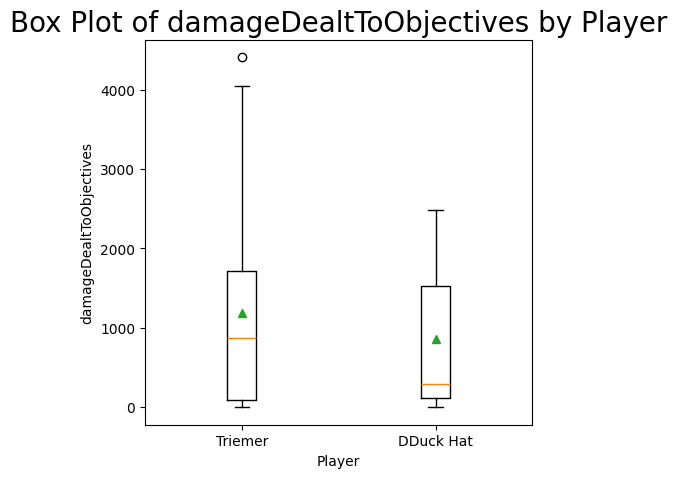

firstBloodKill
summonerName
DDuck Hat    0.111111
Triemer      0.103448
Name: firstBloodKill, dtype: float64


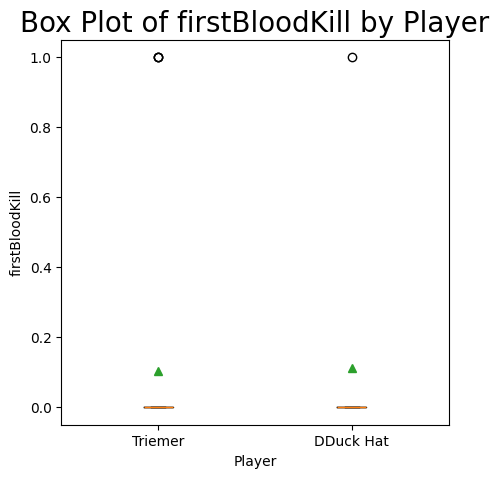

goldEarned
summonerName
DDuck Hat    12955.000000
Triemer      12897.724138
Name: goldEarned, dtype: float64


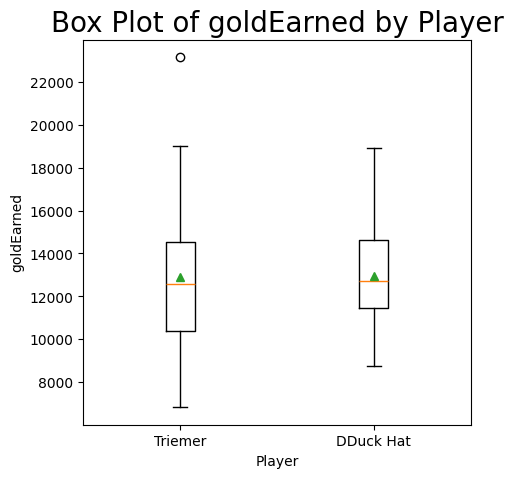

champExperience
summonerName
DDuck Hat    17099.333333
Triemer      17887.310345
Name: champExperience, dtype: float64


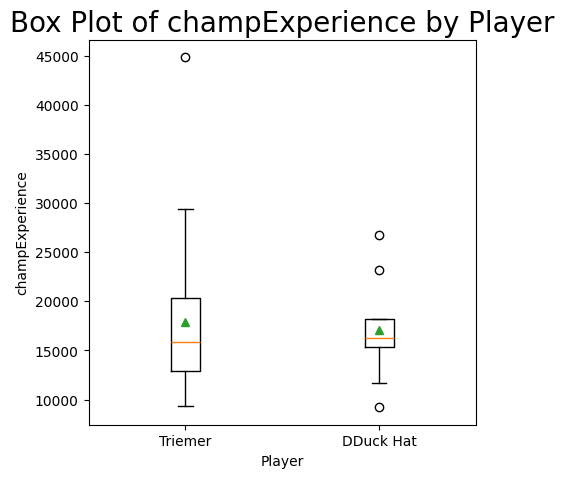

timePlayed
summonerName
DDuck Hat    1035.000000
Triemer      1095.689655
Name: timePlayed, dtype: float64


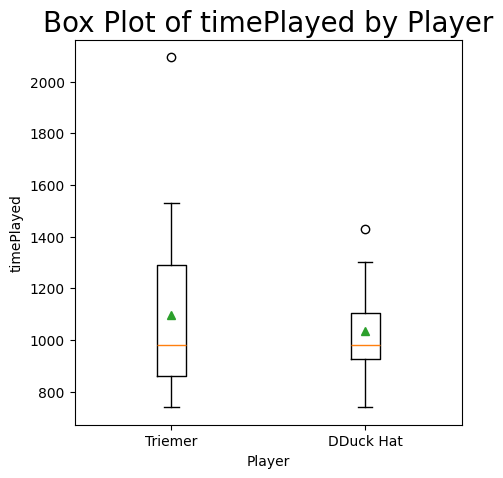

win
summonerName
DDuck Hat    0.444444
Triemer      0.551724
Name: win, dtype: float64


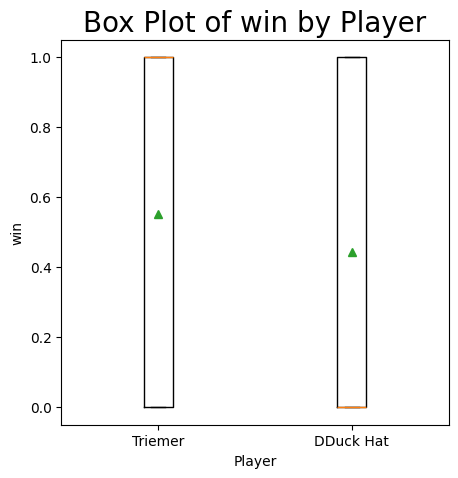

damage
summonerName
DDuck Hat    50010.000000
Triemer      52387.793103
Name: damage, dtype: float64


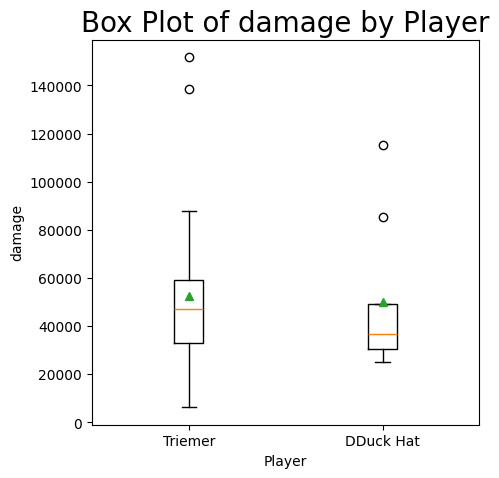

kda
summonerName
DDuck Hat    3.758069
Triemer      4.212130
Name: kda, dtype: float64


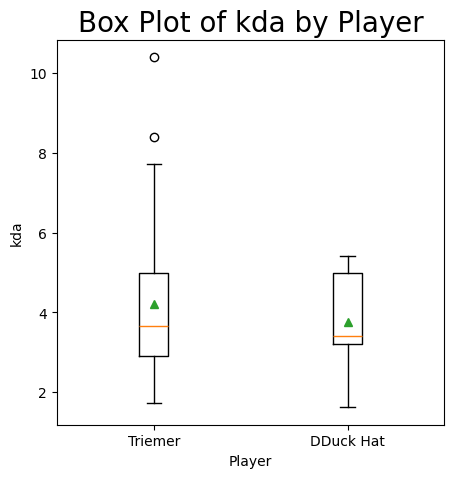

In [15]:
for each in df.columns.tolist():
    if each != 'summonerName':
        print(each)
        plotthis(each)

### Now lets try some MLR!
- Can we predict a game result using the data we have here? To what accuracy?

In [16]:
import numpy as np

In [17]:
df['summonerName']=df.summonerName.replace(to_replace=['DDuck Hat', 'Triemer'], value=[0, 1])

In [18]:
train_df = df.sample(frac = 0.8)

test_df = df.drop(train_df.index)

In [19]:
X_train=(train_df[['kills',
'deaths',
'assists',
'magicDamageDealt',
'physicalDamageDealt',
'damageDealtToObjectives',
'firstBloodKill',
'goldEarned',
'champExperience',
'timePlayed',
'summonerName',
'damage',
'kda']])
y_train=(train_df[['win']])

C:\Users\622379\AppData\Local\Temp\ipykernel_99264\643889483.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train.iloc[:,7],y_train,cmap='rainbow')


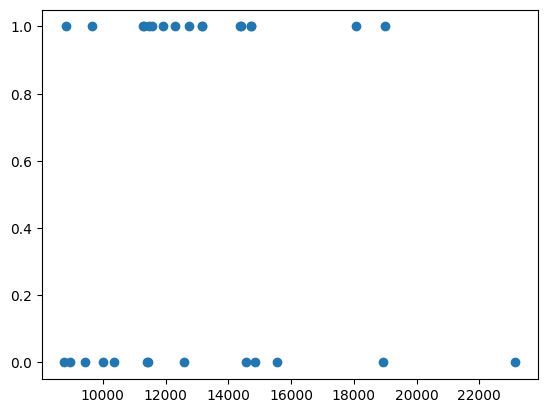

In [46]:
plt.scatter(X_train.iloc[:,7],y_train,cmap='rainbow')
plt.show()

In [ ]:
# from sklearn import linear_model
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# X_encoded = encoder.fit_transform(X)


# model=linear_model.LogisticRegression()
# model.fit(X_train,y_train)
# coefficients=model.coef_.round(3)
# intercept = model.intercept_
# print(coefficients,intercept)

[[-0.266  0.026  0.763  0.    -0.     0.019  0.001  0.003  0.001 -0.057
   0.021 -0.     0.074]] [0.00157501]


c:\Users\622379\Desktop\CXD_JT\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\622379\Desktop\CXD_JT\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
x_test=np.array(test_df[['kills',
'deaths',
'assists',
'magicDamageDealt',
'physicalDamageDealt',
'damageDealtToObjectives',
'firstBloodKill',
'goldEarned',
'champExperience',
'timePlayed',
'summonerName',
'damage',
'kda']])
y_test=np.array(test_df[['win']])

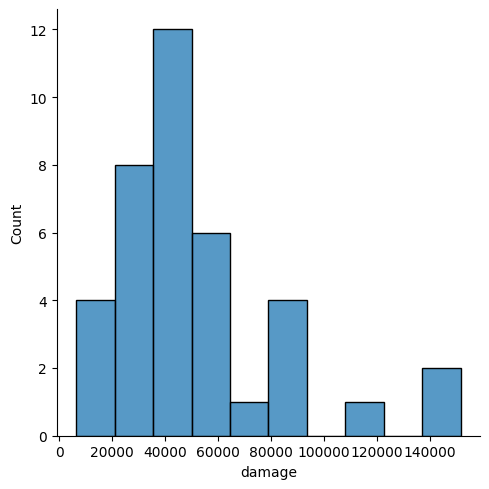

In [ ]:
# penguins = sns.load_dataset("penguins")
import seaborn as sns
sns.displot(data=df['damage'])

In [ ]:
import statsmodels.api as sm

results = sm.GLM(y_train,X_train).fit()
results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    win   No. Observations:                   30
Model:                            GLM   Df Residuals:                       18
Model Family:                Gaussian   Df Model:                           11
Link Function:               Identity   Scale:                         0.13525
Method:                          IRLS   Log-Likelihood:                -4.8967
Date:                Thu, 28 Mar 2024   Deviance:                       2.4346
Time:                        13:03:10   Pearson chi2:                     2.43
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7410
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
kills                      -0.0581      0.043     -1.354      0.176      -0.142       0.026
deaths                     -0.0126      0.059     -0.215      0.829      -0.127       0.102
assists                     0.0054      0.019      0.280      0.780      -0.032       0.043
magicDamageDealt        -2.331e-06   2.37e-06     -0.982      0.326   -6.98e-06    2.32e-06
physicalDamageDealt     -7.275e-06   3.33e-06     -2.183      0.029   -1.38e-05   -7.44e-07
damageDealtToObjectives     0.0003      0.000      2.275      0.023    3.63e-05       0.000
firstBloodKill              0.0708      0.362      0.196      0.845      -0.638       0.779
goldEarned                  0.0003      0.000      1.578      0.114   -6.52e-05       0.001
champExperience          2.356e-05   4.47e-05      0.527      0.599   -6.41e-05       0.000
timePlayed                 -0.0023      0.001     -2.105      0.035      -0.004      -0.000
summonerName               -0.0903      0.191     -0.472      0.637      -0.465       0.284
damage                  -9.606e-06   3.62e-06     -2.655      0.008   -1.67e-05   -2.51e-06
kda                         0.0288      0.111      0.260      0.795      -0.189       0.246
===========================================================================================
"""

In [ ]:
import math

for each in results.params:
    print(math.log(abs (each)))


-2.8460457528181933
-4.372077837459335
-5.2208587103726325
-12.969242652155868
-11.831118106709706
-8.248419697061882
-2.6485973498421926
-8.217960944129125
-10.655901411616034
-6.069235180184901
-2.4047821552935993
-11.553168669542147
-3.547044064233165
